# Player A Report

## Section 1: Performing Correlation on all Biomechanical Markers Irrelevant of Pitch Type Using *.corr()*


### Findings Summary (Median)
1. Positive correlation between *max_pitching_shoulder_external_rotation* and *fatigue_score* with a **threshold = 0.53**
2. Moderate positive correlation between *pitching_shoulder_internal_rotation_external_rotation_at_release* and *fatigue_score* with a **threshold = 0.44**
3. Moderate-weak correlation between *stride_horizontal_angle_at_footstrikes* and *fatigue_score* with a **threshold = 0.34**
4. Moderate-weak correlation between *hip_flexion_extension_drive_leg_at_release* and *fatigue_score* with a **threshold = 0.33**
5. Moderate-weak correlation between *hip_internal_rotation_external_rotation_lead_leg_at_release* and *fatigue_score* with a **threshold = 0.32**
6. Moderate-weak correlation between *knee_flexion_extension_drive_leg_at_footstrike* and *fatigue_score* with a **threshold = 0.31**
7. Moderate-weak correlation between *hip_flexion_extension_lead_leg_at_footstrike* and *fatigue_score* with a **threshold = 0.30**

### Findings Summary (Average)
1. Positive correlation between *max_pitching_shoulder_external_rotation* and *fatigue_score* with a **threshold = 0.53**
2. Moderate correlation between *pitching_shoulder_internal_rotation_external_rotation_at_release* and *fatigue_score* with a **threshold = 0.41**
3. Moderate-weak correlation between *stride_horizontal_angle_at_footstrikes* and *fatigue_score* with a **threshold = 0.37**
4. Moderate-weak correlation between *hip_internal_rotation_external_rotation_lead_leg_at_release* and *fatigue_score* with a **threshold = 0.36**
4. Moderate-weak correlation between *pitching_shoulder_internal_rotation_external_rotation_at_footstrike* and *fatigue_score* with a **threshold = 0.33**
5. Moderate-weak correlation between *hip_flexion_extension_drive_leg_at_release* and *fatigue_score* with a **threshold = 0.32**


In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# import csv files as dataframes 
fatigue = pd.read_csv('fatigue_index.csv', index_col=False)
pitching = pd.read_csv('pitching_mechanics.csv', index_col=False)

In [3]:
# drop rows with values = NaN
fatigue.dropna(inplace=True)
pitching.dropna(inplace=True)

In [4]:
fatigue.head()

,player_id,report_date,game_date,score,last_outing_pitches,pitch_last_4_days,consec,cumulative_inning_pitched
0,pitcher A,2022-04-09,2022-04-01 00:00:00.000000 UTC,0.000000,33.0,0.0,0,0.0
1,pitcher A,2022-04-10,2022-04-01 00:00:00.000000 UTC,0.000000,33.0,0.0,0,0.0
2,pitcher A,2022-04-11,2022-04-10 00:00:00.000000 UTC,12.157287,16.0,16.0,1,2.0
3,pitcher A,2022-04-12,2022-04-10 00:00:00.000000 UTC,5.269455,16.0,16.0,1,2.0
4,pitcher A,2022-04-13,2022-04-12 00:00:00.000000 UTC,17.126998,21.0,37.0,2,3.0


In [5]:
# convert to datetime and format as 'YYYY-MM-DD'
# necessary to join data later
fatigue['game_date'] = pd.to_datetime(fatigue['game_date'].str.replace(" UTC", "", regex=False)).dt.strftime('%Y-%m-%d')

In [6]:
# filter to create two new dataframes for specifically for player A
player_a_fatigue = fatigue[fatigue['player_id'] == 'pitcher A']
player_a_pitching = pitching[pitching['player_id'] == 'pitcher A']

In [7]:
player_a_fatigue.head()

,player_id,report_date,game_date,score,last_outing_pitches,pitch_last_4_days,consec,cumulative_inning_pitched
0,pitcher A,2022-04-09,2022-04-01,0.000000,33.0,0.0,0,0.0
1,pitcher A,2022-04-10,2022-04-01,0.000000,33.0,0.0,0,0.0
2,pitcher A,2022-04-11,2022-04-10,12.157287,16.0,16.0,1,2.0
3,pitcher A,2022-04-12,2022-04-10,5.269455,16.0,16.0,1,2.0
4,pitcher A,2022-04-13,2022-04-12,17.126998,21.0,37.0,2,3.0


In [8]:
player_a_pitching.head()

,player_id,game_date,pitcher_throws,pitch_release_velocity,pitch_spin_rate,inning,pitch_type,hip_shoulder_separation_at_footstrike,pitching_shoulder_abduction_at_footstrike,pitching_shoulder_horizontal_abduction_at_footstrike,...,hip_internal_rotation_external_rotation_lead_leg_at_release,knee_flexion_extension_drive_leg_at_release,knee_flexion_extension_lead_leg_at_release,trunk_forward_bend_at_release,trunk_side_bend_at_release,trunk_rotation_at_release,pelvis_rotation_at_release,arm_slot_degree_at_release,max_pitching_shoulder_external_rotation,max_hip_shoulder_separation
0,pitcher A,2022-04-10,left,83.062208,2382.243810,5,slider,-36.217184,83.874677,35.012383,...,-13.631488,36.161243,22.096567,4.459579,57.157566,116.573903,52.691582,54.0,-174.960703,-41.712959
2,pitcher A,2022-04-10,left,94.252198,2211.490398,5,four_seam,-37.793458,87.338458,27.019318,...,-4.034153,47.683141,19.635491,-4.471398,47.886411,111.422764,52.190563,58.0,-174.510783,-45.404490
5,pitcher A,2022-04-10,left,84.734741,2001.758136,6,changeup,-31.598750,81.940947,31.968270,...,-7.092737,35.643185,42.036187,10.843349,51.107060,112.634941,61.893198,50.0,-175.149040,-39.789503
6,pitcher A,2022-04-10,left,92.849794,2135.750940,5,four_seam,-35.730577,87.779475,27.477848,...,-4.430766,43.812725,21.980203,2.573416,46.222371,113.158652,56.307535,59.0,-173.872259,-45.102926
8,pitcher A,2022-04-10,left,92.887403,40.628180,5,four_seam,-37.156333,84.472629,28.738139,...,-10.045782,40.760135,23.042044,0.564762,47.337532,113.077995,52.932258,60.0,-175.401978,-45.749341


In [9]:
# grab the date of the games player A pitched in
pitching_game_dates = player_a_pitching['game_date'].unique().tolist()

In [10]:
# get the median values for each biomechanical marker for each game player A pitched in
# append the fatigue score for each game to the dataframe
# we will use this dataframe to run the correlation analysis
def get_medians(df1, df2, dates):
    # create an empty list to store the dataframes
    median_df = []
    # iterate through the list of dates
    for date in dates:
        # get the first row of the fatigue dataframe for the given date
        # we only care about the first row because the fatigue score is highest the day after the game
        temp_fatigue = df1[df1['game_date'] == date].iloc[0:1]
        fatigue_score = temp_fatigue['score'].values[0]

        # get the rows of the pitching dataframe for the given date
        temp_pitching = df2[df2['game_date'] == date].copy()
        # drop columns that mess with the medean() function or that we do not need
        temp_pitching.drop(['player_id', 'game_date', 'pitcher_throws', 'inning', 'pitch_type', 'pitch_release_velocity', 'pitch_spin_rate'], axis=1, inplace=True)
        # create a df with the median values for each biomechanical marker
        temp_pitching_median = temp_pitching.median().to_frame().T
        # add the fatigue score to the dataframe
        temp_pitching_median['fatigue_score'] = fatigue_score
        
        # append the dataframe to the list
        median_df.append(temp_pitching_median)

    # concatenate the list of dataframes into one dataframe
    return pd.concat(median_df)

In [11]:
median_df = get_medians(player_a_fatigue, player_a_pitching, pitching_game_dates)

In [12]:
median_df.head()

,hip_shoulder_separation_at_footstrike,pitching_shoulder_abduction_at_footstrike,pitching_shoulder_horizontal_abduction_at_footstrike,pitching_shoulder_internal_rotation_external_rotation_at_footstrike,pitching_elbow_flexion_extension_at_footstrike,hip_flexion_extension_drive_leg_at_footstrike,hip_abduction_adduction_drive_leg_at_footstrike,hip_internal_rotation_external_rotation_drive_leg_at_footstrike,hip_flexion_extension_lead_leg_at_footstrike,hip_abduction_adduction_lead_leg_at_footstrike,...,knee_flexion_extension_drive_leg_at_release,knee_flexion_extension_lead_leg_at_release,trunk_forward_bend_at_release,trunk_side_bend_at_release,trunk_rotation_at_release,pelvis_rotation_at_release,arm_slot_degree_at_release,max_pitching_shoulder_external_rotation,max_hip_shoulder_separation,fatigue_score
0,-34.377127,83.541847,29.228691,-43.460521,88.067517,-10.099879,39.690167,42.839969,37.849693,39.316568,...,36.161243,23.042044,4.925394,50.622177,113.158652,54.850723,54.0,-174.256351,-41.362513,12.157287
0,-41.356925,85.568867,26.874174,-46.943699,85.246134,-9.105785,36.921052,35.798967,42.133106,37.569383,...,43.769436,20.414547,10.455828,47.485280,109.240661,57.296372,60.0,-175.288774,-47.632227,17.126998
0,-37.501840,85.671722,25.637864,-46.265635,90.597942,-10.320919,39.492526,37.184911,41.295597,39.248564,...,42.098351,28.511034,10.973536,45.633256,112.961666,57.504717,55.0,-178.252298,-45.850431,6.197512
0,-39.840365,83.596797,23.896156,-46.959573,85.162874,-12.603512,38.635971,32.506928,41.323673,39.157277,...,36.057712,28.364598,10.200495,50.074431,112.118742,59.135056,53.0,-174.245073,-46.353530,17.059028
0,-28.035543,84.148207,37.352206,-48.775353,87.514884,-6.440533,40.103141,47.050653,40.565487,41.665582,...,33.839256,30.322730,15.145418,49.775388,114.291835,60.150176,51.0,-177.134553,-44.949174,20.933368


In [13]:
# here we can see the correlation values between the fatigue score and each biomechanical marker
median_df.corr()['fatigue_score']

hip_shoulder_separation_at_footstrike                                 -0.192205
pitching_shoulder_abduction_at_footstrike                             -0.220547
pitching_shoulder_horizontal_abduction_at_footstrike                  -0.066469
pitching_shoulder_internal_rotation_external_rotation_at_footstrike    0.273647
pitching_elbow_flexion_extension_at_footstrike                         0.210867
hip_flexion_extension_drive_leg_at_footstrike                         -0.015403
hip_abduction_adduction_drive_leg_at_footstrike                       -0.225679
hip_internal_rotation_external_rotation_drive_leg_at_footstrike        0.193570
hip_flexion_extension_lead_leg_at_footstrike                           0.301458
hip_abduction_adduction_lead_leg_at_footstrike                         0.052707
hip_internal_rotation_external_rotation_lead_leg_at_footstrike         0.112556
knee_flexion_extension_drive_leg_at_footstrike                         0.313656
knee_flexion_extension_lead_leg_at_foots

In [14]:
# return correlated markers based on given threshold
def get_correlated_markers(df, threshold):
    # create an empty dictionary to store the correlated markers
    correlated_markers = {}
    # iterate through the columns of the dataframe
    for marker in df.columns:
        # if the correlation value is greater than the threshold and the marker is not the fatigue_score
        # add the marker and correlation value to the dictionary
        if abs(df[marker].corr(df['fatigue_score'])) > threshold and marker != 'fatigue_score':
            correlated_markers[marker] = df[marker].corr(df['fatigue_score'])
    return correlated_markers

In [15]:
# get correlated markers with a threshold of 0.5
get_correlated_markers(median_df, 0.5)

{'max_pitching_shoulder_external_rotation': -0.5267627795038542}

In [16]:
# get correlated markers with a threshold of 0.4 
get_correlated_markers(median_df, 0.4)

{'pitching_shoulder_internal_rotation_external_rotation_at_release': -0.43864699004750063,
 'max_pitching_shoulder_external_rotation': -0.5267627795038542}

In [17]:
get_correlated_markers(median_df, 0.3)

{'hip_flexion_extension_lead_leg_at_footstrike': 0.30145794374343154,
 'knee_flexion_extension_drive_leg_at_footstrike': 0.31365635239099576,
 'stride_horizontal_angle_at_footstrike': -0.3427856117387504,
 'pitching_shoulder_internal_rotation_external_rotation_at_release': -0.43864699004750063,
 'hip_flexion_extension_drive_leg_at_release': 0.3292612151771446,
 'hip_internal_rotation_external_rotation_lead_leg_at_release': -0.3207823304816629,
 'max_pitching_shoulder_external_rotation': -0.5267627795038542}

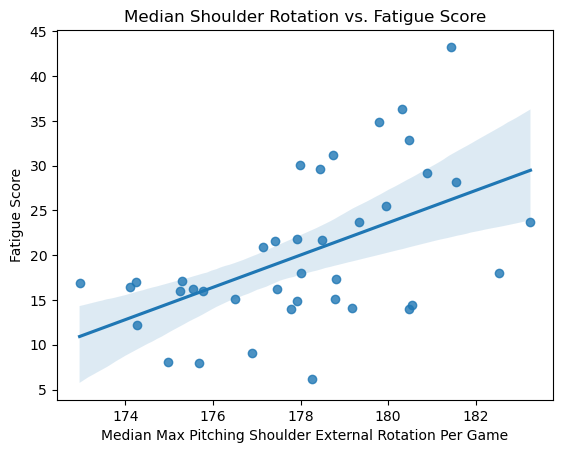

In [18]:
# create a scatter plot of the median max pitching shoulder external rotation per game vs. the fatigue score
ax = sns.regplot(data=abs(median_df), x='max_pitching_shoulder_external_rotation', y='fatigue_score')
# Add axis labels and title
ax.set(xlabel='Median Max Pitching Shoulder External Rotation Per Game', ylabel='Fatigue Score')
plt.title('Median Shoulder Rotation vs. Fatigue Score')
plt.show()

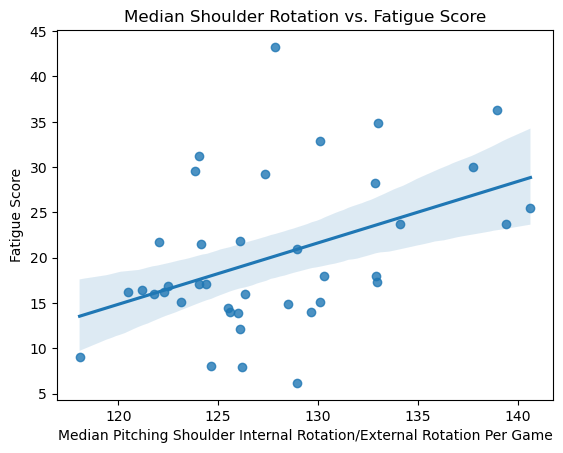

In [19]:
# create a scatter plot of the median pitching shoulder internal rotation/external rotation at release per game vs. the fatigue score
ax = sns.regplot(data=abs(median_df), x='pitching_shoulder_internal_rotation_external_rotation_at_release', y='fatigue_score')
# Add axis labels and title
ax.set(xlabel='Median Pitching Shoulder Internal Rotation/External Rotation Per Game', ylabel='Fatigue Score')
plt.title('Median Shoulder Rotation vs. Fatigue Score')
plt.show()

We found a couple possible biomechanical markers of fatigue using the median. To be safe, now let's try with the average.

In [20]:
# get the average values for each biomechanical marker for each game player A pitched in
# append the fatigue score for each game to the dataframe
# we will use this dataframe to run the correlation analysis
def get_average(df1, df2, dates):
    # create an empty list to store the dataframes
    mean_df = []
    # iterate through the list of dates
    for date in dates:
        # get the first row of the fatigue dataframe for the date
        # we only care about the first row because the fatigue score is highest the day after the game
        temp_fatigue = df1[df1['game_date'] == date].iloc[0:1]
        fatigue_score = temp_fatigue['score'].values[0]

        # get the rows of the pitching dataframe for the date
        temp_pitching = df2[df2['game_date'] == date].copy()
        # drop columns that mess with the mean() function
        temp_pitching.drop(['player_id', 'game_date', 'pitcher_throws', 'inning', 'pitch_type', 'pitch_release_velocity', 'pitch_spin_rate'], axis=1, inplace=True)
        # create a df with the mean values for each biomechanical marker
        temp_pitching_mean = temp_pitching.mean().to_frame().T
        # add the fatigue score to the dataframe
        temp_pitching_mean['fatigue_score'] = fatigue_score
        #temp_pitching_mean.insert(0, 'game_date', date)
        
        # append the dataframe to the list
        mean_df.append(temp_pitching_mean)

    # concatenate the list of dataframes into one dataframe
    return pd.concat(mean_df)

In [21]:
average_df = get_average(player_a_fatigue, player_a_pitching, pitching_game_dates)

In [22]:
average_df.head()

,hip_shoulder_separation_at_footstrike,pitching_shoulder_abduction_at_footstrike,pitching_shoulder_horizontal_abduction_at_footstrike,pitching_shoulder_internal_rotation_external_rotation_at_footstrike,pitching_elbow_flexion_extension_at_footstrike,hip_flexion_extension_drive_leg_at_footstrike,hip_abduction_adduction_drive_leg_at_footstrike,hip_internal_rotation_external_rotation_drive_leg_at_footstrike,hip_flexion_extension_lead_leg_at_footstrike,hip_abduction_adduction_lead_leg_at_footstrike,...,knee_flexion_extension_drive_leg_at_release,knee_flexion_extension_lead_leg_at_release,trunk_forward_bend_at_release,trunk_side_bend_at_release,trunk_rotation_at_release,pelvis_rotation_at_release,arm_slot_degree_at_release,max_pitching_shoulder_external_rotation,max_hip_shoulder_separation,fatigue_score
0,-34.411558,83.978848,30.330391,-43.015321,90.480043,-9.725656,39.829389,42.645631,37.449318,39.590178,...,37.984278,26.545336,4.981479,50.438907,113.421104,55.684659,55.363636,-174.036429,-42.081399,12.157287
0,-41.517875,85.059820,27.028577,-47.205528,87.401872,-9.258897,36.486958,34.826454,42.408743,37.493770,...,43.638823,20.857963,11.634140,47.803134,109.681550,56.913345,57.650000,-175.302948,-47.227465,17.126998
0,-37.222450,84.328100,25.374586,-47.519089,91.806978,-10.189256,39.027669,36.710912,41.494876,39.667345,...,42.701772,29.790247,10.031706,47.679520,112.964604,56.916850,54.571429,-178.227098,-45.720313,6.197512
0,-39.791155,84.382050,23.821452,-47.129099,86.573839,-11.549337,38.741103,33.247042,41.623484,39.213090,...,37.001443,30.109105,9.138538,50.357471,112.584427,58.744351,54.466667,-174.490680,-46.599130,17.059028
0,-28.335391,85.346040,35.885331,-47.548991,87.872779,-6.788867,40.147819,47.229432,40.532919,41.559768,...,35.114527,27.375521,14.223137,49.503372,114.309349,59.280703,52.210526,-177.792901,-45.054843,20.933368


In [23]:
# get correlated markers with a threshold of 0.5
get_correlated_markers(average_df, 0.5)

{'max_pitching_shoulder_external_rotation': -0.5314411914557038}

In [24]:
# get correlated markers with a threshold of 0.4
get_correlated_markers(average_df, 0.4)

{'pitching_shoulder_internal_rotation_external_rotation_at_release': -0.410397285319122,
 'max_pitching_shoulder_external_rotation': -0.5314411914557038}

In [25]:
get_correlated_markers(average_df, 0.3)

{'pitching_shoulder_internal_rotation_external_rotation_at_footstrike': 0.3274015749303039,
 'stride_horizontal_angle_at_footstrike': -0.37249015132629765,
 'pitching_shoulder_internal_rotation_external_rotation_at_release': -0.410397285319122,
 'hip_flexion_extension_drive_leg_at_release': 0.3213138439387691,
 'hip_internal_rotation_external_rotation_lead_leg_at_release': -0.3569587238131721,
 'max_pitching_shoulder_external_rotation': -0.5314411914557038}

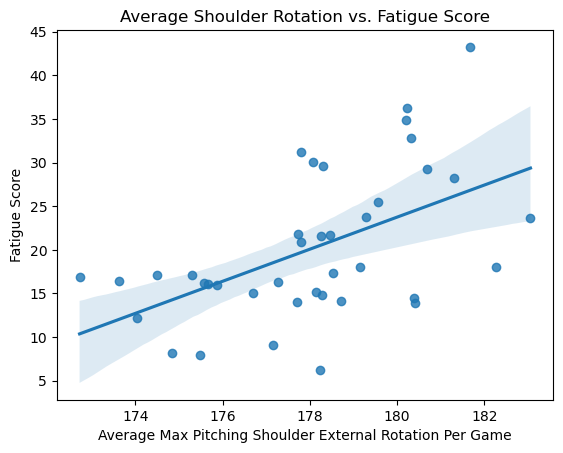

In [26]:
# create a scatter plot of the average max pitching shoulder external rotation per game vs. the fatigue score
ax = sns.regplot(data=abs(average_df), x='max_pitching_shoulder_external_rotation', y='fatigue_score')
# Add axis labels and title
ax.set(xlabel='Average Max Pitching Shoulder External Rotation Per Game', ylabel='Fatigue Score')
plt.title('Average Shoulder Rotation vs. Fatigue Score')
plt.show()

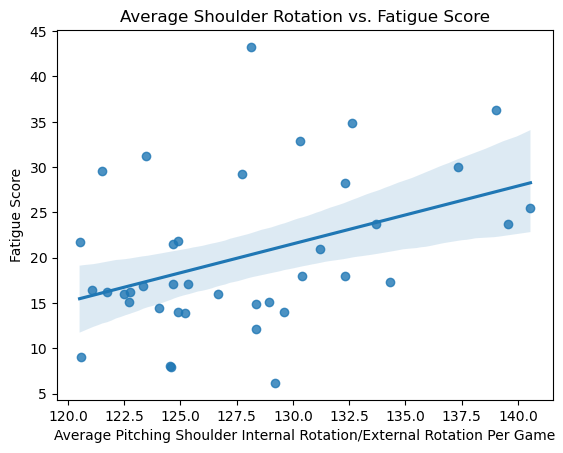

In [27]:
# create a scatter plot of the average pitching shoulder internal rotation/external rotation at release per game vs. the fatigue score
ax = sns.regplot(data=abs(average_df), x='pitching_shoulder_internal_rotation_external_rotation_at_release', y='fatigue_score')
# Add axis labels and title
ax.set(xlabel='Average Pitching Shoulder Internal Rotation/External Rotation Per Game', ylabel='Fatigue Score')
plt.title('Average Shoulder Rotation vs. Fatigue Score')
plt.show()

Note: Moving forward with the other players, we will just use the average game data.

## Section 2: Performing Correlation on all Biomechanical Markers Irrelevant of Pitch Type Using *.corrwith()*

### Finding Summary (Average):
1. *max_pitching_shoulder_external_rotation* with **p=0.000499**
2. *pitching_shoulder_internal_rotation_external_rotation_at_release* with **p=0.009460**
3. *stride_horizontal_angle_at_footstrike* with p=**0.019530**
4. *hip_internal_rotation_external_rotation_lead_leg_at_release* with **p=0.025698**
5. *pitching_shoulder_internal_rotation_external_rotation_at_footstrike* with p=**0.041895**
6. *hip_flexion_extension_drive_leg_at_release* with **p=0.046091**

In [28]:
# drop the fatigue_score column to use the biomechanical markers as features
features = average_df.drop('fatigue_score', axis=1)
# set the target variable as the fatigue_score
target = average_df['fatigue_score']

In [29]:
# Compute correlations
correlations = features.corrwith(target).sort_values(ascending=False)
print("Correlation of biomechanical markers with fatigue score:\n", correlations)

Correlation of biomechanical markers with fatigue score:
 pitching_shoulder_internal_rotation_external_rotation_at_footstrike    0.327402
hip_flexion_extension_drive_leg_at_release                             0.321314
hip_flexion_extension_lead_leg_at_footstrike                           0.295486
knee_flexion_extension_drive_leg_at_footstrike                         0.284649
pitching_elbow_flexion_extension_at_footstrike                         0.251035
knee_flexion_extension_lead_leg_at_release                             0.245725
knee_flexion_extension_lead_leg_at_footstrike                          0.235774
trunk_forward_bend_at_footstrike                                       0.233316
stride_length_at_footstrike                                            0.203920
pitching_elbow_flexion_extension_at_release                            0.176985
hip_internal_rotation_external_rotation_drive_leg_at_footstrike        0.154437
hip_flexion_extension_lead_leg_at_release                     

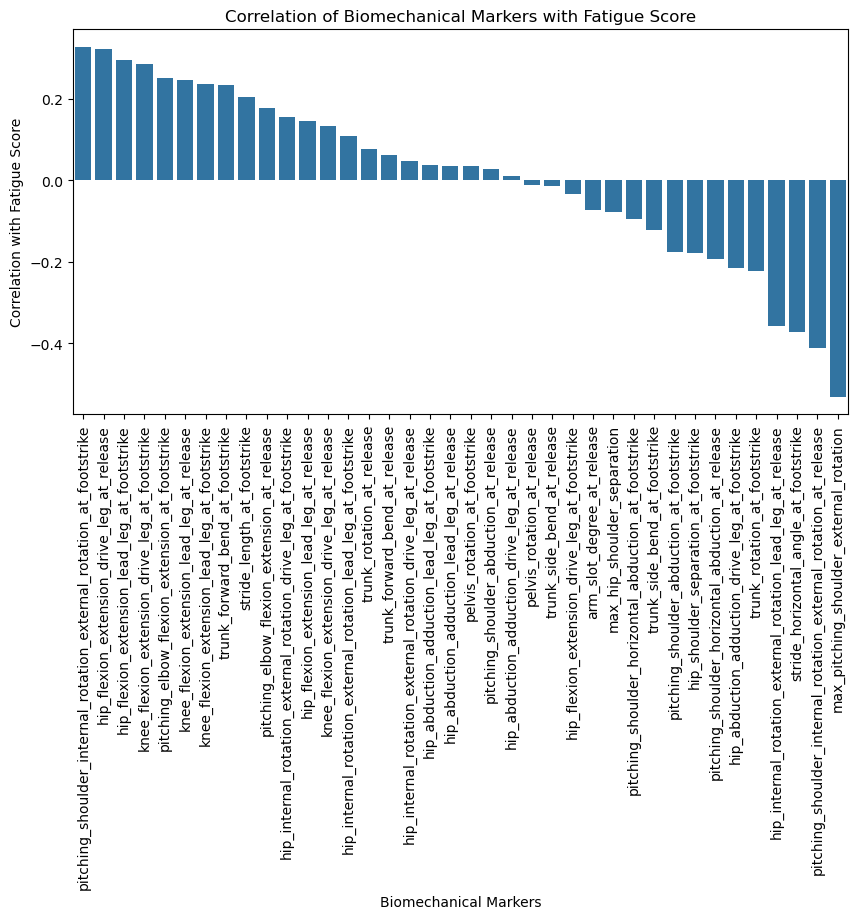


Feature Importance:
                                               Feature  Coefficient    F-Value  \
36            max_pitching_shoulder_external_rotation    -5.935144  14.562895   
21  pitching_shoulder_internal_rotation_external_r...     2.553895   7.493932   
17              stride_horizontal_angle_at_footstrike    30.182991   5.960759   
28  hip_internal_rotation_external_rotation_lead_l...    -2.623042   5.402966   
3   pitching_shoulder_internal_rotation_external_r...     1.498611   4.442271   
23         hip_flexion_extension_drive_leg_at_release    -4.658020   4.259765   
8        hip_flexion_extension_lead_leg_at_footstrike     4.882851   3.539587   
11     knee_flexion_extension_drive_leg_at_footstrike    -2.703425   3.262243   
4      pitching_elbow_flexion_extension_at_footstrike    -1.309504   2.488514   
30         knee_flexion_extension_lead_leg_at_release    -3.018345   2.377659   
12      knee_flexion_extension_lead_leg_at_footstrike     5.483377   2.177876   
13    

In [30]:
# Plot correlations
plt.figure(figsize=(10, 5))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=90)
plt.xlabel("Biomechanical Markers")
plt.ylabel("Correlation with Fatigue Score")
plt.title("Correlation of Biomechanical Markers with Fatigue Score")
plt.show()

# Feature selection using linear regression
reg = LinearRegression()
reg.fit(features, target)

# Compute F-statistics and p-values
f_values, p_values = f_regression(features, target)

# Create a DataFrame to summarize results
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': reg.coef_,
    'F-Value': f_values,
    'P-Value': p_values
}).sort_values(by='P-Value')

print("\nFeature Importance:\n", feature_importance)

# Identify significant markers (p < 0.05)
significant_markers = feature_importance[feature_importance['P-Value'] < 0.05]
print("\nSignificant Biomechanical Markers:", significant_markers['Feature'].tolist())


## Section 3: Using a Random Forest

### Summary:
Instead of using *corr()* or *corrwith()*, we tried using another regression/machine learning model to see if we get a different output. After running the model, *max_pitching_shoulder_external_rotation* continues to be the top predictor with the other markers following. 

In [31]:
# drop the fatigue_score column to use the biomechanical markers as features
X = average_df.drop('fatigue_score', axis=1)
# set the target variable as the fatigue_score
y = average_df['fatigue_score']

# create a random forest regressor model
model = RandomForestRegressor()
# fit the model to the data
model.fit(X, y)

# get the feature importances from the model
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# print the feature importances
print(feature_importance)

max_pitching_shoulder_external_rotation                                0.156366
pitching_shoulder_internal_rotation_external_rotation_at_release       0.103824
hip_flexion_extension_lead_leg_at_footstrike                           0.075616
knee_flexion_extension_lead_leg_at_release                             0.059482
hip_abduction_adduction_drive_leg_at_release                           0.055027
pitching_shoulder_internal_rotation_external_rotation_at_footstrike    0.052126
hip_flexion_extension_drive_leg_at_release                             0.048622
stride_horizontal_angle_at_footstrike                                  0.037818
pitching_shoulder_horizontal_abduction_at_release                      0.031197
pitching_shoulder_abduction_at_footstrike                              0.030664
arm_slot_degree_at_release                                             0.020761
knee_flexion_extension_drive_leg_at_footstrike                         0.020211
trunk_rotation_at_footstrike            